In [132]:
# add Matplotlib magic and dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
#Read the city data file and store it in Pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)

# Read the ride data file and store it in a Pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
# Get the the number of rows.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"] == "Urban")

66

In [9]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"] == "Suburban")

36

In [10]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"] == "Rural")

18

In [11]:
# Get the number of rows
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
# Get ride_data data types.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# Merge the dataframes into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ["city", "city"])

In [15]:
# Create the Urban Suburban and Rural cities DataFrames.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [16]:
# Get the number of rides for urban, suburban, and rural cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [17]:
# Average fares for each city type
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [18]:
# Average number of drivers for each city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

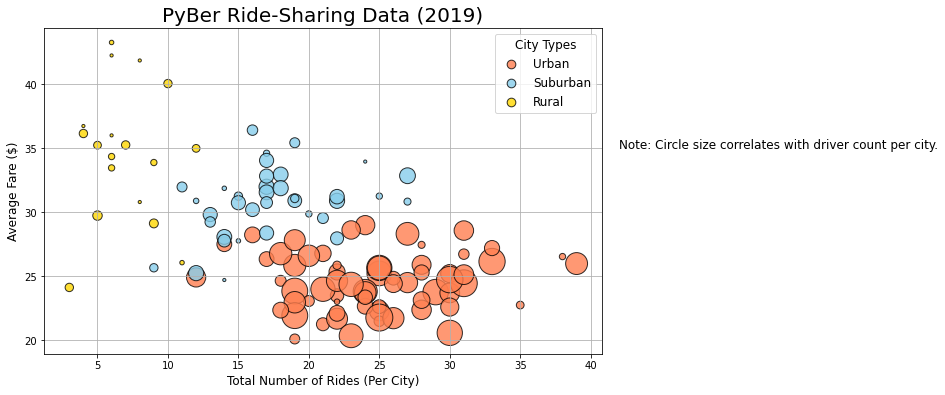

In [19]:
# Add the scatter charts for each type of city.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
# Create a Legend.
lgnd = plt.legend(fontsize="12", mode ="Expanded",
                 scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Save the figure.
plt.savefig("analysis/Fig1.png")
# Show the plot
plt.show()

In [20]:
# Get Summary Statistics
urban_cities_df.describe()
suburban_cities_df.describe()
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [21]:
# Get summary statistics.
urban_ride_count.describe()
suburban_ride_count.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [22]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [23]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [57]:
# Calculate the mode of the ride count for each city type.
print(urban_ride_count.mode())
print(suburban_ride_count.mode())
print(rural_ride_count.mode())

0    22
1    25
dtype: int64
0    17
dtype: int64
0    6
dtype: int64


In [54]:
# (NUMPY) Calculate the measures of central tendency for the ride count for the urban cities.
print("URBAN CITIES")
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

# (NUMPY) Calculate the measures of central tendency for the ride count for the suburban cities.
print("SUBURBAN CITIES")
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

# (NUMPY) Calculate the measures of central tendency for the ride count for the rural cities.
print("RURAL CITIES")
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

URBAN CITIES
The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
SUBURBAN CITIES
The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).
RURAL CITIES
The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [41]:
# Get the fares for each city type.
urban_fares = urban_cities_df["fare"]

suburban_fares = suburban_cities_df["fare"]

rural_fares = rural_cities_df["fare"]

In [65]:
# Calculate the measures of central tendency for the average fare for each city type.
print("URBAN CITIES")
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare prices for urban trips is ${mean_urban_fares:.2f}.")
      
median_urban_fares = np.median(urban_fares)
print(f"The median fare prices for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare prices for urban trips is ${mode_urban_fares}.")

print("SUBURBAN CITIES")
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare prices for suburban trips is ${mean_suburban_fares:.2f}.")
      
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare prices for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare prices for suburban trips is ${mode_suburban_fares}.")

print("RURAL CITIES")
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare prices for rural trips is ${mean_rural_fares:.2f}.")
      
median_rural_fares = np.median(rural_fares)
print(f"The median fare prices for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare prices for rural trips is ${mode_rural_fares}.")

URBAN CITIES
The mean fare prices for urban trips is $24.53.
The median fare prices for urban trips is $24.64.
The mode fare prices for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).
SUBURBAN CITIES
The mean fare prices for suburban trips is $30.97.
The median fare prices for suburban trips is $30.75.
The mode fare prices for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).
RURAL CITIES
The mean fare prices for rural trips is $34.62.
The median fare prices for rural trips is $37.05.
The mode fare prices for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [58]:
# Get the driver count data from the cities.
urban_drivers = urban_cities_df["driver_count"]

suburban_drivers = suburban_cities_df["driver_count"]

rural_drivers = rural_cities_df["driver_count"]

In [66]:
# Calculate the mean, median, and mode for the urban, suburban, and rural driver count Series using NumPy and SciPy statistics module.
print("URBAN CITIES")
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers for urban cities is {mean_urban_drivers:.1f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers for urban cities is {median_urban_drivers:.1f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers in urban cities is {mode_urban_drivers}.")
      
print("SUBURBAN CITIES")
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban cities is {mean_suburban_drivers:.1f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers for suburban cities is {median_suburban_drivers:.1f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers in suburban cities is {mode_suburban_drivers}.")

print("RURAL CITIES")
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers for rural cities is {mean_rural_drivers:.1f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers for rural cities is {median_rural_drivers:.1f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers in rural cities is {mode_rural_drivers}.")

URBAN CITIES
The mean number of drivers for urban cities is 36.7.
The median number of drivers for urban cities is 37.0.
The mode number of drivers in urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).
SUBURBAN CITIES
The mean number of drivers for suburban cities is 13.7.
The median number of drivers for suburban cities is 16.0.
The mode number of drivers in suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).
RURAL CITIES
The mean number of drivers for rural cities is 4.3.
The median number of drivers for rural cities is 4.0.
The mode number of drivers in rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


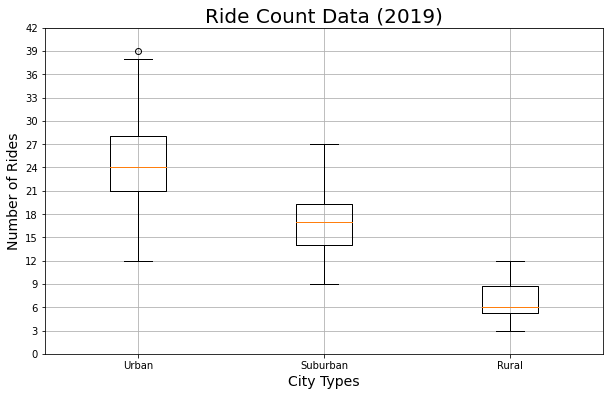

In [102]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [81]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


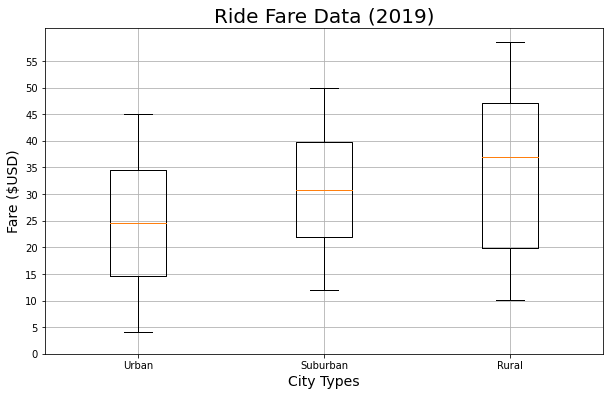

In [104]:
# Add all ride fare box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

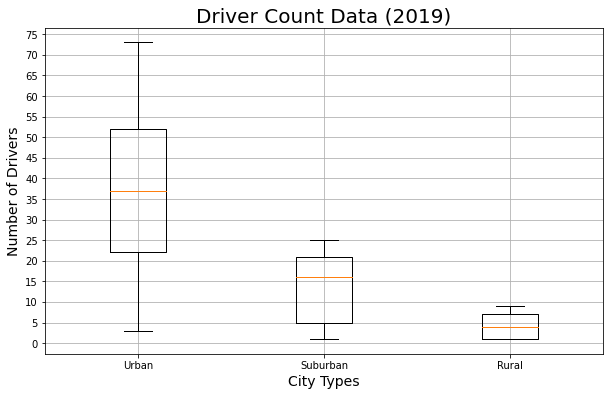

In [118]:
# Add all driver count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [122]:
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [125]:
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [127]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [128]:
# Calculate the percentage of fare for each city type. (MORE ADVANCED)
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

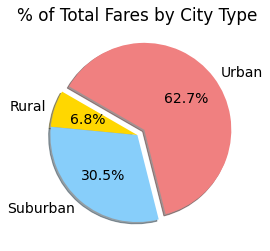

In [137]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig5.png")

# Show Figure
plt.show()